# Projet : Forage de données IFT870

# Séparation de donnéesdes données
Ce notebook conient les traces des démarches entreprises pour separer les données en ensemble d'entraînement, de validation et de test

## Installation des dépendances

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from DataTransformation import *
import importlib

## Importation de données
Cette cellule est copiée de roi_augmentation.ipynb.

In [3]:
mat_data = load_data('mat')

In [4]:
# Validation
classified_data = classify_data(mat_data)
print(len(classified_data[0])) # 708
print(len(classified_data[1])) # 1426
print(len(classified_data[2])) # 930
total = len(classified_data[0]) + len(classified_data[1]) + len(classified_data[2])
print(total)

708
1426
930
3064


## Séparation des données
On utilise la classe DataSeparator pour effectuer le reste du travail.

In [5]:
# DataSeparator a besoin de fonctions de transformation pour etre instantie
# flip_horizontal = Transformation(flip_horizontal)
# flip_vertical = Transformation(flip_vertical)
# rotate_90 = Transformation(rotate_90)
equalizing_transformations = [Transformation(rotate_90), Transformation(flip_horizontal), Transformation(flip_vertical)]
augmentation_transformations = [Transformation(rotate_90)]
    
dataSeparator = DataSeparator(classified_data, equalizing_transformations)

In [6]:
# On separe les donnees
dataSeparator.separate_data()

# Validation
print(sum([len(sub_list) for sub_list in dataSeparator.mat_train])) # 2452
print(sum([len(sub_list) for sub_list in dataSeparator.mat_test])) # 306
print(sum([len(sub_list) for sub_list in dataSeparator.mat_val])) # 306

2452
306
306


## Égalisation des données d'entraînement

In [7]:
dataSeparator.equalize_train()

n_par_classe:  [504, 1222, 726]
n_requis:  [718, 0, 496]
Augmentation des donnees d'entrainement de la classe 0
25% complete
50% complete
75% complete
100% complete
Les donnees de la classe 1 sont suffisantes
Augmentation des donnees d'entrainement de la classe 2
25% complete
50% complete
75% complete
100% complete


In [8]:
# Validation
print('Chaque classe devrait avoir 1222')
print(len(dataSeparator.mat_train[0]))
print(len(dataSeparator.mat_train[1]))
print(len(dataSeparator.mat_train[2]))

# print(dataSeparator.mat_train[0])
# print(dataSeparator.mat_train[0]['84_eq_rotate'])

Chaque classe devrait avoir 1222
1222
1222
1222


À ce stade-ci, chaque classe de l'ensemble d'entrainement est également représentée

## Augmentation des données d'entraînement

In [11]:
dataSeparator.augment_train(Transformation(rotate_90))
dataSeparator.augment_train(Transformation(gaussian_blur))

Augmentation des donnees d'entrainement de la classe 0
Transformation: rotate
25% complete
50% complete
75% complete
100% complete
Augmentation des donnees d'entrainement de la classe 1
Transformation: rotate
25% complete
50% complete
75% complete
100% complete
Augmentation des donnees d'entrainement de la classe 2
Transformation: rotate
25% complete
50% complete
75% complete
100% complete
Augmentation des donnees d'entrainement de la classe 0
Transformation: gaussi
25% complete
50% complete
75% complete
100% complete
Augmentation des donnees d'entrainement de la classe 1
Transformation: gaussi
25% complete
50% complete
75% complete
100% complete
Augmentation des donnees d'entrainement de la classe 2
Transformation: gaussi
25% complete
50% complete
75% complete
100% complete


4888
4888
4888


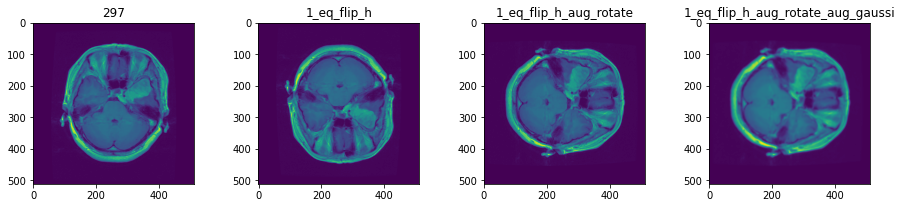

In [28]:
# Validation
print(len(dataSeparator.mat_train[0]))
print(len(dataSeparator.mat_train[1]))
print(len(dataSeparator.mat_train[2]))

mat_train_0_as_list = list(dataSeparator.mat_train[0])
original_key = mat_train_0_as_list[0]


# display of transformations
fig, axs = plt.subplots(1, 4, figsize=(15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
axs[0].imshow(dataSeparator.mat_train[0][original_key]['cjdata']['image'])
axs[0].title.set_text('297')
axs[1].imshow(dataSeparator.mat_train[0][original_key + '_eq_flip_h']['cjdata']['image'])
axs[1].title.set_text(original_key + '_eq_flip_h')
axs[2].imshow(dataSeparator.mat_train[0][original_key + '_eq_flip_h_aug_rotate']['cjdata']['image'])
axs[2].title.set_text(original_key + '_eq_flip_h_aug_rotate')
axs[3].imshow(dataSeparator.mat_train[0][original_key + '_eq_flip_h_aug_rotate_aug_gaussi']['cjdata']['image'])
axs[3].title.set_text(original_key + '_eq_flip_h_aug_rotate_aug_gaussi')

## Sauvegarde sur le disque
Les données sont sauvegardées sur le disque puisque leur traitement comporte des facteur aléatoire et on veut pouvoir effectuer différents essais avec les mêmes données.

In [30]:
%%time
dataSeparator.save_to_file_system()

Sauvegarde des donnees de validation de la classe 0
Sauvegarde des donnees de test de la classe 0
Sauvegarde des donnees d'entrainement de la classe 0
Sauvegarde des donnees de validation de la classe 1
Sauvegarde des donnees de test de la classe 1
Sauvegarde des donnees d'entrainement de la classe 1



KeyboardInterrupt

